# A Family of B-Splines

A B-splines is a finite-support function that is even-symmetric and blob-shaped.
We now plot the first ten members of the family of B-splines, as ordered
by their degree.

## B-Spline Function

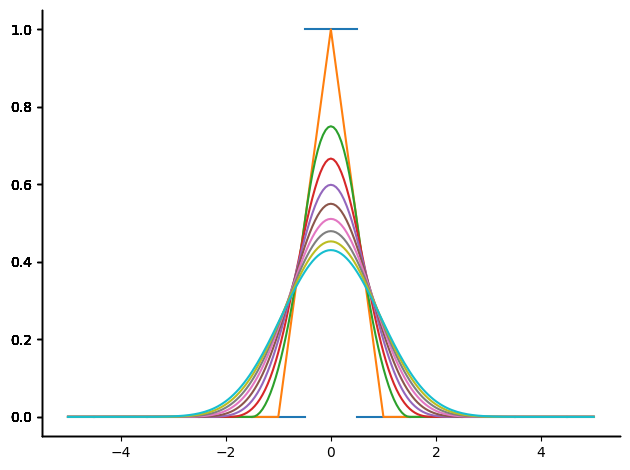

In [18]:
# Load the required libraries.
import matplotlib.pyplot as plt

import splinekit as sk # This library

# Setup
highest_degree = 9
largest_supp = sk.b_spline_support(highest_degree)
period = int(largest_supp.diameter)
subplot = plt.subplots()

# One plot per degree
for degree in range(highest_degree + 1):
    # Construct a spline from a non-overlapping periodic B-spline
    s = sk.PeriodicSpline1D.periodized_b_spline(
        period = period,
        degree = degree
    )
    # Add the plot of the B-spline, with reduced cluttering
    s.plot(
        subplot,
        plotdomain = sk.interval.Open((-0.5 * period, 0.5 * period)),
        plotrange = sk.interval.Closed((-0.05, 1.05)),
        plotpoints = 201,
        line_fmt = "-C" + str(degree), # Distinguish degrees by color
        marker_fmt = "", # No markers at the integers
        stem_fmt = "None", # No stems at the integers
        knot_marker = "", # No knots at the integers
        periodbound_marker_fmt = "", # No marker at the period bounds
        periodbound_stem_fmt = "None" # No stem at the period bounds
    )
plt.show()

## B-Spline Gradient

B-splines of degree $n$ are $n$-times differentiable, and continuously
differentiable $\left(n-1\right)$ times. We now plot the gradient (*i.e.*,
the first derivative) of the B-splines of degree $1$ to $9$.

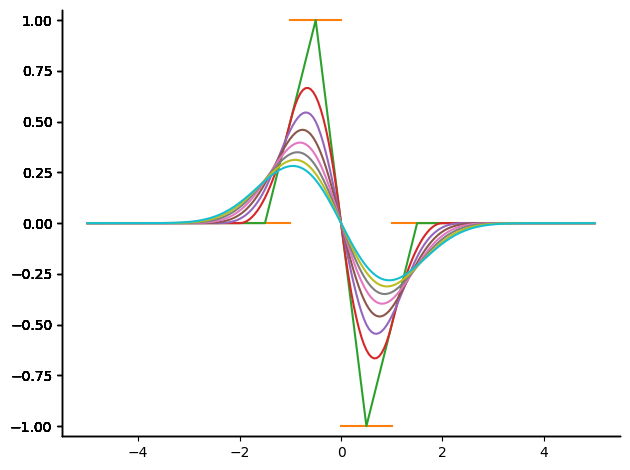

In [19]:
# Load the required libraries.
import matplotlib.pyplot as plt

import splinekit as sk # This library

# Setup
highest_degree = 9
largest_supp = sk.b_spline_support(highest_degree)
period = int(largest_supp.diameter)
subplot = plt.subplots()

# One plot per degree
for degree in range(1, highest_degree + 1):
    # Construct a spline from a non-overlapping periodic B-spline
    s = sk.PeriodicSpline1D.periodized_b_spline(
        period = period,
        degree = degree
    )
    s = s.gradient()
    # Add the plot of the B-spline, with reduced cluttering
    s.plot(
        subplot,
        plotdomain = sk.interval.Open((-0.5 * period, 0.5 * period)),
        plotrange = sk.interval.Closed((-1.05, 1.05)),
        plotpoints = 201,
        line_fmt = "-C" + str(degree), # Distinguish degrees by color
        marker_fmt = "", # No markers at the integers
        stem_fmt = "None", # No stems at the integers
        knot_marker = "", # No knots at the integers
        periodbound_marker_fmt = "", # No marker at the period bounds
        periodbound_stem_fmt = "None" # No stem at the period bounds
    )
plt.show()

## B-Spline Integral

We now plot the integral of B-splines.

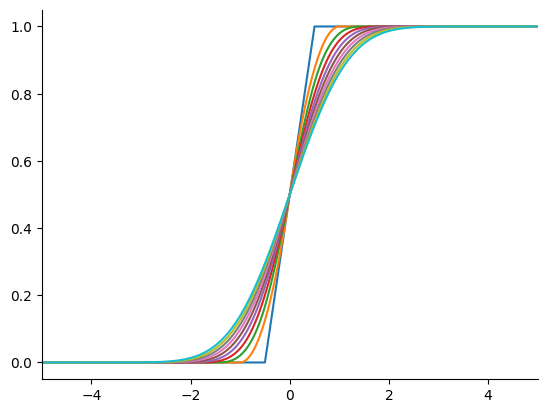

In [20]:
# Load the required libraries.
import math
import matplotlib.pyplot as plt
import numpy as np

import splinekit as sk # This library

# Setup
highest_degree = 9
pts = 200 + 1
largest_supp = sk.b_spline_support(highest_degree)
supp = int(largest_supp.diameter)

# Location of the samples
abscissa = np.array(
    [-supp / 2 + supp * k / (pts - 1) for k in range(pts)],
    dtype = float
)

# One plot per degree
for degree in range(highest_degree + 1):
    # Integrated B-spline
    spline_data = np.array(
        [sk.integrated_b_spline(x, degree) for x in abscissa],
        dtype = float
    )
    plt.xlim(-supp / 2, supp / 2)
    plt.ylim(-0.05, 1.05)
    ax = plt.gca()
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    plt.plot(
        abscissa,
        spline_data,
        "-C" + str(degree), # Distinguish degrees by color
    )
plt.show()
